# Telechargement du dataset 

In [ ]:
# Etape 1
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token = {"username":"username","key":"api-key"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
# Etape 2 : importer kaggle.json de l'ordinateur

In [ ]:
# Etape 3
!kaggle competitions download -c recursion-cellular-image-classification

401 - Unauthorized


In [ ]:
# Etape 4 : Mount Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Etape 5
%cd /content/drive/MyDrive/2CS/S2/BDM/tpbdm

In [ ]:
# Etape 6
!kaggle competitions download -c recursion-cellular-image-classification

In [ ]:
# Etape 7
!unzip /content/drive/MyDrive/2CS/S2/BDM/tpbdm/recursion-cellular-image-classification.zip -d  /content/drive/MyDrive/2CS/S2/BDM/tpbdm/unzipped 

In [ ]:
# Etape 8 : Afin de synchroniser avec drive 
from google.colab import drive
drive.flush_and_unmount()

# Installation de Spark

In [ ]:
# Etape 1 : Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Etape 2
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.2.1
!wget -q http://apache.osuosl.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz



In [ ]:
# Etape 3
# unzip it
!tar xf /content/spark-3.2.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

In [ ]:
# Etape 4
# Setting environment 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
# Etape 5
# Check installation
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark
df = spark.createDataFrame([{"TP BDM": "Bouloudene-Slimani"} for x in range(100)])
df.show(3, False)
# Check the pyspark version
import pyspark
print(pyspark.__version__)

+------------------+
|TP BDM            |
+------------------+
|Bouloudene-Slimani|
|Bouloudene-Slimani|
|Bouloudene-Slimani|
+------------------+
only showing top 3 rows

3.2.1


#Importing required libraries and setting the dataset path 

In [ ]:

import tensorflow as tf
# Keras is an API to make CNN easier
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os
import sys
import pandas as pd  
import numpy as np
import PIL.Image as Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample

# In order to get the images (stack the 6 channels) we can use the functions in rxrx1-utils
!git clone https://github.com/recursionpharma/rxrx1-utils
sys.path.append('rxrx1-utils')
import rxrx.io as rio


PATH_DATASET ='/content/drive/MyDrive/2CS/S2/BDM/tpbdm/unzipped'

Cloning into 'rxrx1-utils'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 124
Receiving objects: 100% (127/127), 1.59 MiB | 11.30 MiB/s, done.
Resolving deltas: 100% (62/62), done.


# Apprentissage : 

# Input layer  : 

In [ ]:
# Get train_images
train_images = pd.read_csv (os.path.join(PATH_DATASET, "train.csv"))
#train_images = pd.merge(train_images,pd.read_csv(os.path.join(PATH_DATASET, "pixel_stats.csv")), right_on =  ['id_code'], left_on =  ['id_code'], how='left')

print(train_images.shape) # nbr lignes , nbr colonnes 
train_images_sample= train_images.head(3000) #Getting just a sample of the data because of lack of ressources
# this means the sample's size will be 60000 since we take into consideration both sitess
print(train_images_sample.head(10))


(36517, 5)
          id_code experiment  plate well       sirna
0  HEPG2-01_1_B03   HEPG2-01      1  B03   sirna_250
1  HEPG2-01_1_B04   HEPG2-01      1  B04    sirna_62
2  HEPG2-01_1_B05   HEPG2-01      1  B05  sirna_1115
3  HEPG2-01_1_B06   HEPG2-01      1  B06   sirna_602
4  HEPG2-01_1_B07   HEPG2-01      1  B07   sirna_529
5  HEPG2-01_1_B08   HEPG2-01      1  B08   sirna_863
6  HEPG2-01_1_B09   HEPG2-01      1  B09   sirna_334
7  HEPG2-01_1_B10   HEPG2-01      1  B10  sirna_1104
8  HEPG2-01_1_B11   HEPG2-01      1  B11   sirna_153
9  HEPG2-01_1_B12   HEPG2-01      1  B12   sirna_372


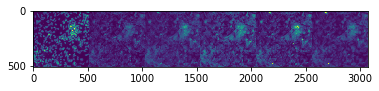

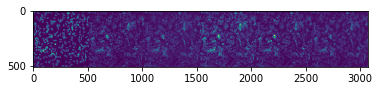

In [ ]:
# Viewing all 6 channels of an example image 
# site 1
img1 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s1_w1.png"))
img2 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s1_w2.png"))
img3 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s1_w3.png"))
img4 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s1_w4.png"))
img5 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s1_w5.png"))
img6 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s1_w6.png"))

img12 = np.concatenate((img1, img2), axis=1)
img34 = np.concatenate((img3, img4), axis=1)
img56 = np.concatenate((img5, img6), axis=1)
imgInt = np.concatenate((img12, img34), axis=1)
imgFin = np.concatenate((imgInt, img56), axis=1)
plt.imshow(imgFin, interpolation='nearest')
plt.show()

# site 2
img1 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s2_w1.png"))
img2 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s2_w2.png"))
img3 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s2_w3.png"))
img4 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s2_w4.png"))
img5 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s2_w5.png"))
img6 = Image.open(os.path.join(PATH_DATASET,"train/HEPG2-01/Plate1/B03_s2_w6.png"))

img12 = np.concatenate((img1, img2), axis=1)
img34 = np.concatenate((img3, img4), axis=1)
img56 = np.concatenate((img5, img6), axis=1)
imgInt = np.concatenate((img12, img34), axis=1)
imgFin = np.concatenate((imgInt, img56), axis=1)
plt.imshow(imgFin, interpolation='nearest')
plt.show()

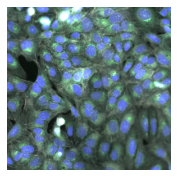

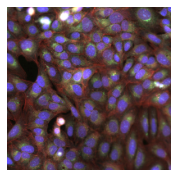

In [ ]:
# viewing example image with merged channels
RGB_MAP = {
    1: {
        'rgb': np.array([19, 0, 249]),
        'range': [0, 51]
    },
    2: {
        'rgb': np.array([42, 255, 31]),
        'range': [0, 107]
    },
    3: {
        'rgb': np.array([255, 255, 255]),
        'range': [0, 64]
    },
    4: {
        'rgb': np.array([45, 255, 252]),
        'range': [0, 191]
    },
    5: {
        'rgb': np.array([250, 0, 253]),
        'range': [0, 89]
    },
    6: {
        'rgb': np.array([254, 255, 40]),
        'range': [0, 191]
    }
}
# site 1
y = rio.load_site_as_rgb('train', 'U2OS-03', 1, 'B03', 1,rgb_map=RGB_MAP)
y = tf.image.resize(y, (200, 200))
x = y/ 255.0
# rio.load_site_as_rgb (type_dataset, experience, plate, well, site, channels = {we can use the default ones that is set to [1,2,3,4,5,6]}, imgs_base_url, rgb_map = {it's a template set for merging the different channels of the image, we can use the default one or use one of our own } )
plt.figure(figsize=(3, 3))
plt.axis('off')
_ = plt.imshow(x)
# site 2
y = rio.load_site_as_rgb('train', 'U2OS-03', 1, 'B03', 1)
y = tf.image.resize(y, (200, 200))
x = y/ 255.0
# rio.load_site_as_rgb (type_dataset, experience, plate, well, site, channels = {we can use the default ones that is set to [1,2,3,4,5,6]}, imgs_base_url, rgb_map = {it's a template set for merging the different channels of the image, we can use the default one or use one of our own } )
plt.figure(figsize=(3, 3))
plt.axis('off')
_ = plt.imshow(x)

In [ ]:
# fct to generate dataframe with path to image inside train/test folder
# s : site (1-2)
# w : channel (1-6)
# function to create the dataset
def generate_df(full_df,type_data):
    # we duplicate the data to take into consideration the two sites 
    df1 = full_df.copy()
    df1 ['site'] = '1'
    df2 = full_df.copy()
    df2 ['site'] = '2'
    df = pd.concat([df1, df2])
    df = df.reset_index(drop=True)
    df['path'] = df['experiment'].str.cat(df['plate'].astype(str).str.cat(df['well'],sep='/'),sep='/Plate') + '_s'+df['site']+'_w'
    df['data_type'] = type_data
    df['id_code_with_site'] = df['id_code'] + "_" + df['site']
    df['img'] = 'null'
    for row in df.index :
      print(row)
      y= rio.load_site_as_rgb(type_data, df['experiment'][row], df['plate'][row],df['well'][row], df['site'][row])
      # Resize the images (reduce resolution because of the machine's performance)
      y = tf.image.resize(y, (200, 200))
      # Normalize data
      #Every image is made up of pixels that range from 0 to 255. We need to normalize them i.e convert the range between 0 to 1  before passing it to the model.
      x = y/ 255.0
      df['img'][row] = tf.convert_to_tensor(x)
      
    df = df.drop(columns=['experiment','plate','well','path','data_type','site']).reindex(columns=['id_code_with_site','id_code','img','sirna'])
    df = df.sort_values('id_code_with_site')
    df = df.reset_index(drop=True)
    return df

#print(train_images_sample.head(5))
train_df = generate_df(train_images_sample, "train")
'''
print (train_df.head(5))
plt.figure(figsize=(4, 4))
plt.axis('off')
_ = plt.imshow(train_df['img'][0])
'''

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189

"\nprint (train_df.head(5))\nplt.figure(figsize=(4, 4))\nplt.axis('off')\n_ = plt.imshow(train_df['img'][0])\n"

In [ ]:
# Dividing the dataset into learning and validation dataset

n=train_df.shape[0]
numbers = list(range(0,n))
index = sample(numbers, int(0.7 * n))



Appren =  pd.DataFrame(columns = ['id_code_with_site','id_code','img','sirna'])
for i in index :
  Appren =  Appren.append(train_df[i:(i+1)])

Appren = Appren.reset_index(drop=True)
print(Appren.shape)



validation =  pd.DataFrame(columns = ['id_code_with_site','id_code','img','sirna'])
for i in numbers :
  if not (i in index) :
    validation =  validation.append(train_df[i:(i+1)])
validation = validation.reset_index(drop=True)
print(validation.shape)

(4200, 4)
(1800, 4)


In [ ]:
# defining categories
featureCategories =  pd.DataFrame(columns = ['sirna','category'])
row = 0
for value in np.unique(train_df['sirna']) :
  featureCategories = featureCategories.append ({'sirna':value, 'category':float(row)}, ignore_index=True)
  row = row +1
  #featureCategories = featureCategories.append ({'sirna':value, 'category':value.replace('sirna_','')}, ignore_index=True) 
  # can't do this one because there are values bigger than 1108 
print (featureCategories.shape)
print (featureCategories.head())

(1107, 2)
        sirna  category
0     sirna_0       0.0
1     sirna_1       1.0
2    sirna_10       2.0
3   sirna_100       3.0
4  sirna_1000       4.0


In [ ]:
# Defining training labels
Appren_labels = pd.merge(Appren['sirna'], featureCategories, on=['sirna','sirna'])
print (Appren_labels.shape)
print (Appren_labels.head())

# Defining Validation labels
validation_labels = pd.merge(validation['sirna'], featureCategories, on=['sirna','sirna'])
print (validation_labels.shape)
print (validation_labels.head())

(4200, 2)
       sirna  category
0  sirna_654     738.0
1  sirna_654     738.0
2  sirna_654     738.0
3  sirna_654     738.0
4  sirna_759     849.0
(1800, 2)
       sirna  category
0  sirna_250     300.0
1   sirna_62     701.0
2   sirna_62     701.0
3  sirna_863     959.0
4  sirna_863     959.0


In [ ]:
# Defining Validation and training sets
x_train = np.array([np.array(val) for val in Appren['img']])
y_train = Appren_labels['category']

x_validation = np.array([np.array(val) for val in validation['img']])
y_validation = validation_labels['category']

# Defining the model 

In [ ]:
tm = tf.keras.Sequential(
    [

# Convolution (Convolution layers + Activation function)
# purpose : to Keep the most important features in an image
# result : feature map/activation map  
# kernel size : (3,3)
# convolution dimension : 2d (since the images are colored we can use up to 3D | but it takes too much ressources)
# Applies the rectified linear unit activation function
    tf.keras.layers.Conv2D(32, (4,4), activation="relu",input_shape=(200, 200, 3)),

# Pooling (Pooling Layer)
# purpose : to ensures that the main features of the image are maintained while reducing the size of the image further (spatial invariance)
# result : pooled feature map
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #tf.keras.layers.BatchNormalization(axis=-1),

# Convolution (Convolution layers + Activation function)
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
# Pooling (Pooling Layer)
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #tf.keras.layers.BatchNormalization(axis=-1),
     
# Flattening
# result : transforming the pooled feature map into one column
    tf.keras.layers.Flatten(),
# Full connection (Fully Connected Layer / Dense layer)
    tf.keras.layers.Dense(1108, activation="relu"),
# Dropout Layer : 
# purpose : to reduce overfitting (We specify a % of connctions to be dropped during the training process to force the network to actually learn patterns instead of memorisng the data)  
    tf.keras.layers.Dropout(rate=0.3),

# Full connection (Fully Connected Layer / Dense layer)
    tf.keras.layers.Dense(featureCategories.shape[0], activation='softmax')
]
)

tm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 197, 197, 32)      1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 1108)             

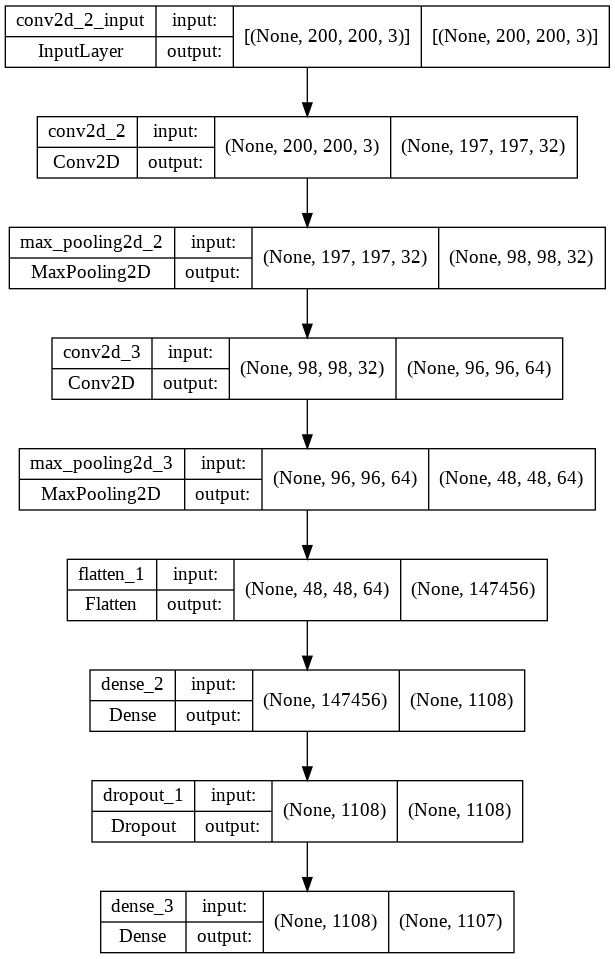

In [ ]:
# plot the model
tf.keras.utils.plot_model(
    tm,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

# Compiling the model

In [ ]:
'''
    the adm optimizer : used for multiclass classification
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
'''
tm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# training the model

In [ ]:
historyTm = tm.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))
# The model gives better results when the training sample taken is bigger, however for time and ressources problems we had to limit ourselves to a sample
# we did test the model with bigger results before this last execution

Epoch 1/10
132/132 [==============================] - 479s 4s/step - loss: 7.4508 - accuracy: 0.0000e+00 - val_loss: 7.0158 - val_accuracy: 0.0000e+00
Epoch 2/10
132/132 [==============================] - 485s 4s/step - loss: 7.0116 - accuracy: 7.1429e-04 - val_loss: 7.0211 - val_accuracy: 0.0000e+00
Epoch 3/10
132/132 [==============================] - 480s 4s/step - loss: 7.0051 - accuracy: 0.0014 - val_loss: 7.0331 - val_accuracy: 0.0000e+00
Epoch 4/10
132/132 [==============================] - 477s 4s/step - loss: 6.9767 - accuracy: 0.0076 - val_loss: 7.0745 - val_accuracy: 0.0000e+00
Epoch 5/10
132/132 [==============================] - 480s 4s/step - loss: 6.3033 - accuracy: 0.0829 - val_loss: 7.8285 - val_accuracy: 5.5556e-04
Epoch 6/10
132/132 [==============================] - 482s 4s/step - loss: 2.3384 - accuracy: 0.6388 - val_loss: 12.6244 - val_accuracy: 0.0011
Epoch 7/10
132/132 [==============================] - 487s 4s/step - loss: 0.6169 - accuracy: 0.9129 - val_loss: 

# Evaluating the model 

{'loss': [7.4508, 7.0116, 7.0051, 6.9767, 6.3033, 2.3384, 0.6169, 0.3107, 0.2059, 0.1255], 'accuracy': [0.0002380952355451882, 0.0009523809421807528, 0.0014, 0.0076, 0.0829, 0.6388, 0.9129, 0.9593, 0.9695, 0.9817], 'val_loss': [7.0158, 7.0211, 7.0331, 7.0745, 7.8285, 12.6244, 17.9304, 23.1666, 20.0562, 18.787], 'val_accuracy': [0.0, 0.0, 0.0005555555690079927, 0.0005555555690079927, 0.0011, 0.0, 0.0, 0.0, 0.0011, 0.0005555555690079927]}


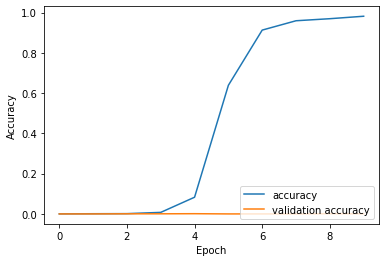

In [ ]:
# Monitoring the model’s performance : accuracy
print(historyTm.history)
plt.plot(historyTm.history['accuracy'], label='accuracy')
plt.plot(historyTm.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


{'loss': [7.4508, 7.0116, 7.0051, 6.9767, 6.3033, 2.3384, 0.6169, 0.3107, 0.2059, 0.1255], 'accuracy': [0.0002380952355451882, 0.0009523809421807528, 0.0014, 0.0076, 0.0829, 0.6388, 0.9129, 0.9593, 0.9695, 0.9817], 'val_loss': [7.0158, 7.0211, 7.0331, 7.0745, 7.8285, 12.6244, 17.9304, 23.1666, 20.0562, 18.787], 'val_accuracy': [0.0, 0.0, 0.0005555555690079927, 0.0005555555690079927, 0.0011, 0.0, 0.0, 0.0, 0.0011, 0.0005555555690079927]}


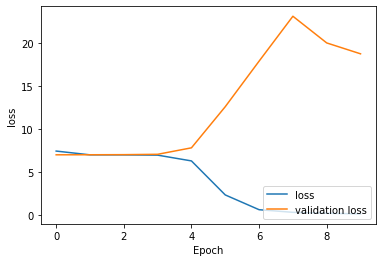

In [ ]:
# Monitoring the model’s performance : loss
print(historyTm.history)
plt.plot(historyTm.history['loss'], label='loss')
plt.plot(historyTm.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
# Validating modele
test_loss, test_acc = tm.evaluate(x_validation,  y_validation, batch_size=200)

print('Accuracy on validation dataset:', test_acc)
print('Loss on validation dataset:', test_loss)

Accuracy on validation dataset: 0.0005555555690079927
Loss on validation dataset: 18.787


# Making predictions

In [ ]:
#Predicting known values
predictions = tm.predict(x_validation)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_validation[np.argmax(predictions[0])])
y_validation [0]

[0.00100071 0.00109752 0.00100451 ... 0.00105049 0.0009899  0.00096507]
803
16.0


300.0

(19899, 4)
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
2
3
4
5
6
7
8
9
  id_code_with_site         id_code  \
0  HEPG2-08_1_B03_1  HEPG2-08_1_B03   
1  HEPG2-08_1_B03_2  HEPG2-08_1_B03   

                                                 img  sirna  
0  (((tf.Tensor(0.3733506, shape=(), dtype=float3...    NaN  
1  (((tf.Tensor(0.18862745, shape=(), dtype=float...    NaN  


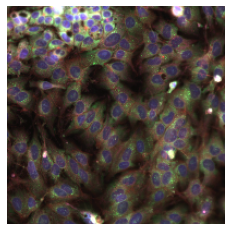

In [ ]:
# Get test_images
test_images = pd.read_csv (os.path.join(PATH_DATASET, "test.csv"))

print(test_images.shape) # nbr lignes , nbr colonnes 

test_images_sample = test_images.head(5)

test_df = generate_df(test_images_sample, "test")
print (test_df.head(2))
plt.figure(figsize=(4, 4))
plt.axis('off')
_ = plt.imshow(test_df['img'][0])

In [ ]:
x_test = np.array([np.array(val) for val in test_df['img']])
print(x_test[0])

[[[0.3733506  0.37296626 0.29288784]
  [0.3612894  0.34558904 0.27001882]
  [0.2924471  0.30473727 0.20861177]
  ...
  [0.22892533 0.20017251 0.30134916]
  [0.25248796 0.21580556 0.30135685]
  [0.3143984  0.27001882 0.27943838]]

 [[0.32181334 0.3213161  0.2405349 ]
  [0.3430494  0.30084547 0.2524016 ]
  [0.21591373 0.2252157  0.15537256]
  ...
  [0.23610964 0.21541938 0.33167037]
  [0.24271059 0.20698981 0.3125239 ]
  [0.27466673 0.23543063 0.31776315]]

 [[0.30967844 0.26861963 0.20698039]
  [0.29861176 0.25167844 0.2016863 ]
  [0.21886274 0.15533337 0.1232157 ]
  ...
  [0.24729407 0.21627437 0.33250952]
  [0.25387442 0.25418034 0.3527685 ]
  [0.22380395 0.2227059  0.30514508]]

 ...

 [[0.07524688 0.05349001 0.05098039]
  [0.07894172 0.05259633 0.05019627]
  [0.09764715 0.089883   0.0573335 ]
  ...
  [0.12407874 0.08776436 0.06741159]
  [0.10281546 0.08627451 0.0596782 ]
  [0.09559964 0.0681957  0.05246238]]

 [[0.08897562 0.05911686 0.05127372]
  [0.04705882 0.04097568 0.02921098]


In [ ]:
probability_model = tf.keras.Sequential([tm, tf.keras.layers.Softmax()])
preds = probability_model.predict(x_test)
print(preds[0])
print(np.argmax(preds[0]))

[0.00090343 0.00090352 0.00090343 ... 0.00090348 0.00090342 0.0009034 ]
803
